In [1]:
import pandas as pd
import yfinance as yf
import talib as ta
import numpy as np

In [2]:
ticker = "BTC-USD"
df = yf.Ticker(ticker).history(period="max")

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [4]:
df.shape

(3513, 7)

In [5]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-25 00:00:00+00:00,64275.019531,65275.207031,62783.632812,64481.707031,32155786816,0.0,0.0
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312,24139372950,0.0,0.0
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625,19530783039,0.0,0.0
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.0,0.0
2024-04-29 00:00:00+00:00,63103.300781,63297.140625,62011.277344,62489.425781,21136222208,0.0,0.0


In [6]:
df['Settle'] = (df['High']-df['Open'])*100
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle
Date,,,,,,,,
2024-04-25 00:00:00+00:00,64275.019531,65275.207031,62783.632812,64481.707031,32155786816,0.0,0.0,100018.750000
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312,24139372950,0.0,0.0,30428.515625
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625,19530783039,0.0,0.0,14737.500000
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.0,0.0,89796.875000
2024-04-29 00:00:00+00:00,63103.300781,63297.140625,62011.277344,62489.425781,21136222208,0.0,0.0,19383.984375


In [7]:
time_period_ATR = 14
time_period_ADX = 14
time_period_RSI = 14
time_period_SMA = 30

In [8]:
df['EMA12'] = ta.EMA(df['Settle'].values, timeperiod=12)
df['EMA26'] = ta.EMA(df['Settle'].values, timeperiod=26)
df['MA12'] = ta.MA(df['Settle'].values, timeperiod=12)
df['MA26'] = ta.MA(df['Settle'].values, timeperiod=26)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=time_period_ATR) # 1
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Settle'].values, timeperiod=time_period_ADX) # 2
df['RSI'] = ta.RSI(df['Settle'].values, timeperiod=time_period_ADX) # 3
df['SMA'] = ta.SMA(df['Settle'].values, timeperiod=time_period_SMA) # 4
macd, macdsignal, macdhist = ta.MACD(df['Settle'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle,EMA12,EMA26,MA12,MA26,ATR,ADX,RSI,SMA,MACD,MACDsignal
Date,,,,,,,,,,,,,,,,,,
2024-04-25 00:00:00+00:00,64275.019531,65275.207031,62783.632812,64481.707031,32155786816,0.0,0.0,100018.750000,121731.401372,134943.973649,134880.013021,131146.334135,89139.734305,21.632016,48.816307,128524.765625,-13212.572277,-7735.134075
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312,24139372950,0.0,0.0,30428.515625,107684.803565,127202.087870,120847.395833,125662.815505,85393.778395,22.086702,46.655525,123753.085938,-19517.284305,-10091.564121
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625,19530783039,0.0,0.0,14737.500000,93385.218401,118871.377657,112583.854167,126196.529447,81684.926199,22.823610,46.159397,117266.835938,-25486.159256,-13170.483148
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.0,0.0,89796.875000,92833.165570,116717.710793,112263.834635,129637.334736,79392.001783,23.222982,48.955652,119699.075521,-23884.545223,-15313.295563
2024-04-29 00:00:00+00:00,63103.300781,63297.140625,62011.277344,62489.425781,21136222208,0.0,0.0,19383.984375,81533.291540,109507.805133,108424.869792,124738.070913,75705.830060,23.883176,46.515075,118805.052083,-27974.513593,-17845.539169


In [9]:
df['ClgtEMA12'] = np.where(df['Settle'] > df['EMA12'], 1, -1)
df['ClgtEMA26'] = np.where(df['Settle'] > df['EMA26'], 1, -1)
df['ClgtMA12'] = np.where(df['Settle'] > df['MA12'], 1, -1)
df['ClgtMA26'] = np.where(df['Settle'] > df['MA26'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle,EMA12,EMA26,...,ADX,RSI,SMA,MACD,MACDsignal,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-25 00:00:00+00:00,64275.019531,65275.207031,62783.632812,64481.707031,32155786816,0.0,0.0,100018.750000,121731.401372,134943.973649,...,21.632016,48.816307,128524.765625,-13212.572277,-7735.134075,-1,-1,-1,-1,1
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312,24139372950,0.0,0.0,30428.515625,107684.803565,127202.087870,...,22.086702,46.655525,123753.085938,-19517.284305,-10091.564121,-1,-1,-1,-1,1
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625,19530783039,0.0,0.0,14737.500000,93385.218401,118871.377657,...,22.823610,46.159397,117266.835938,-25486.159256,-13170.483148,-1,-1,-1,-1,1
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.0,0.0,89796.875000,92833.165570,116717.710793,...,23.222982,48.955652,119699.075521,-23884.545223,-15313.295563,-1,-1,-1,-1,1
2024-04-29 00:00:00+00:00,63103.300781,63297.140625,62011.277344,62489.425781,21136222208,0.0,0.0,19383.984375,81533.291540,109507.805133,...,23.883176,46.515075,118805.052083,-27974.513593,-17845.539169,-1,-1,-1,-1,1


In [10]:
df['Return'] = df['Settle'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df['Return'] > 0, 1, -1)
df['target_reg'] = df['Return']
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Settle,EMA12,EMA26,...,MACD,MACDsignal,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD,Return,target_cls,target_reg
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,230.999756,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,-1.000000,-1,-1.000000
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,0.000000,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,inf,1,inf
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,373.199463,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,6.669621,1,6.669621
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,2862.298584,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,-0.848339,-1,-0.848339
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,434.100342,NaN,NaN,...,NaN,NaN,-1,-1,-1,-1,-1,0.800501,1,0.800501


In [11]:
predictors_list = ['ATR', 'ADX', 'RSI', 'SMA', 'ClgtEMA12', 'ClgtEMA26', 'ClgtMA12', 'ClgtMA26', 'MACDSIGgtMACD']
tmp = df[predictors_list]

tmp = tmp.fillna(0)
highest_non_inf = tmp.max().loc[lambda v: v<np.Inf].max()
tmp.replace(np.Inf, highest_non_inf)

tmp.tail()

,ATR,ADX,RSI,SMA,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD
Date,,,,,,,,,
2024-04-25 00:00:00+00:00,89139.734305,21.632016,48.816307,128524.765625,-1,-1,-1,-1,1
2024-04-26 00:00:00+00:00,85393.778395,22.086702,46.655525,123753.085938,-1,-1,-1,-1,1
2024-04-27 00:00:00+00:00,81684.926199,22.823610,46.159397,117266.835938,-1,-1,-1,-1,1
2024-04-28 00:00:00+00:00,79392.001783,23.222982,48.955652,119699.075521,-1,-1,-1,-1,1
2024-04-29 00:00:00+00:00,75705.830060,23.883176,46.515075,118805.052083,-1,-1,-1,-1,1


In [12]:
predictors_list = ['ATR', 'ADX', 'RSI', 'SMA', 'ClgtEMA12', 'ClgtEMA26', 'ClgtMA12', 'ClgtMA26', 'MACDSIGgtMACD']
X = df[predictors_list]
X.tail()

,ATR,ADX,RSI,SMA,ClgtEMA12,ClgtEMA26,ClgtMA12,ClgtMA26,MACDSIGgtMACD
Date,,,,,,,,,
2024-04-25 00:00:00+00:00,89139.734305,21.632016,48.816307,128524.765625,-1,-1,-1,-1,1
2024-04-26 00:00:00+00:00,85393.778395,22.086702,46.655525,123753.085938,-1,-1,-1,-1,1
2024-04-27 00:00:00+00:00,81684.926199,22.823610,46.159397,117266.835938,-1,-1,-1,-1,1
2024-04-28 00:00:00+00:00,79392.001783,23.222982,48.955652,119699.075521,-1,-1,-1,-1,1
2024-04-29 00:00:00+00:00,75705.830060,23.883176,46.515075,118805.052083,-1,-1,-1,-1,1


In [13]:
y_cls = df.target_cls
y_cls.tail()

y_rgs = df.target_reg
y_rgs.tail()

Date
2024-04-25 00:00:00+00:00   -0.695772
2024-04-26 00:00:00+00:00   -0.515668
2024-04-27 00:00:00+00:00    5.093087
2024-04-28 00:00:00+00:00   -0.784135
2024-04-29 00:00:00+00:00         NaN
Name: target_reg, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(2459, 9) (2459,)
(1054, 9) (1054,)


In [15]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(2459, 9) (2459,)
(1054, 9) (1054,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [17]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

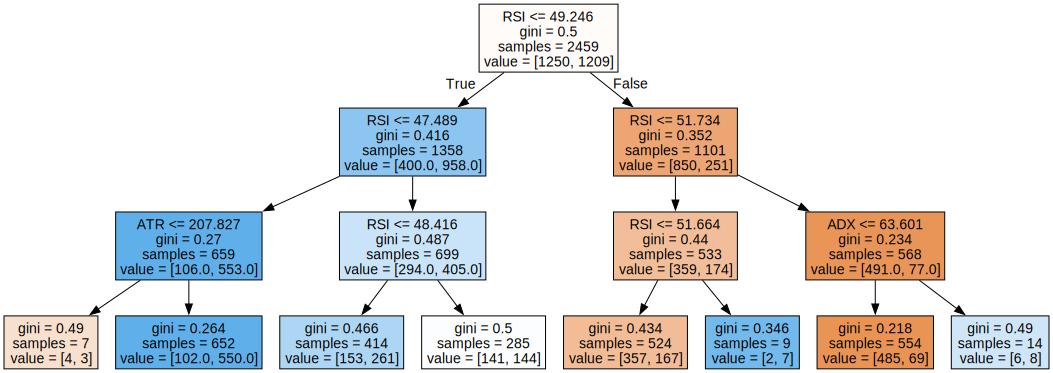

In [18]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graph = graphviz.Source(dot_data)
graph


In [19]:
y_cls_pred = clf.predict(X_cls_test)


In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.75      0.66      0.70       536
           1       0.69      0.78      0.73       518

    accuracy                           0.72      1054
   macro avg       0.72      0.72      0.72      1054
weighted avg       0.72      0.72      0.72      1054



In [21]:
if np.all(np.isfinite(X_rgs_train)) or np.all(np.isfinite(y_rgs_train)):
    print("! INFINITE !")


In [22]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X_rgs_train_with_imputed_values = my_imputer.fit_transform(X_rgs_train)
X_rgs_train1=np.array(X_rgs_train)

In [23]:
X_rgs_train.head()
X_rgs_train.isin([np.inf, -np.inf]).values.any()

False

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 200)
X_rgs_train.shape

(2459, 9)

In [25]:
import sys
np.all(X_rgs_train>sys.float_info.max)

False

In [26]:
def limitcomma(value, limit=2):
    v = str(value).split(".")
    if len(v)>1:
        return float(v[0]+"."+v[1][:limit])
    else:
        return float("0.0")
#X_rgs_train2=X_rgs_train
y_rgs_train2=y_rgs_train


for i in range(len(y_rgs_train)):
    y_rgs_train2.iloc[i] = limitcomma(y_rgs_train.iloc[i])


In [27]:
print(y_rgs_train2.shape)

(2459,)


In [28]:
dtr.fit(X_rgs_train, y_rgs_train2)

DecisionTreeRegressor(min_samples_leaf=200)

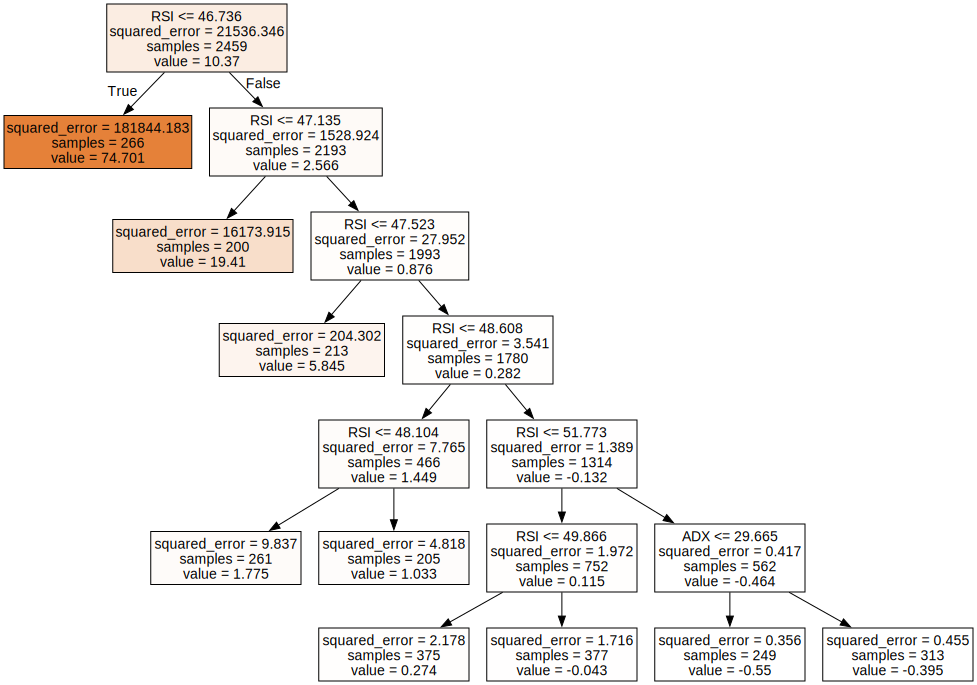

In [29]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr,
                  out_file=None,
                  filled=True,
                  feature_names=predictors_list)
graphviz.Source(dot_data)

In [30]:
predictors_list

['ATR',
 'ADX',
 'RSI',
 'SMA',
 'ClgtEMA12',
 'ClgtEMA26',
 'ClgtMA12',
 'ClgtMA26',
 'MACDSIGgtMACD']